In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline


In [2]:
df = pd.read_csv('data/데이터.csv', encoding='euc-kr')
df.tail(10)

,Cstno,Age,Sex,Income,USE_Month,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
10117,712503408,57,M,6~8천만원미만,40,17925000,17498000,111
10118,713755458,50,M,6~8천만원미만,36,9959000,10310000,63
10119,716893683,55,F,Unknown,47,14657000,6009000,53
10120,710841183,54,M,4~6천만원미만,34,13940000,15577000,114
10121,713899383,56,F,2천만원미만,50,3688000,14596000,120
10122,772366833,50,M,2~4천만원미만,40,4003000,15476000,117
10123,710638233,41,M,2~4천만원미만,25,4277000,8764000,69
10124,716506083,44,F,2천만원미만,36,5409000,10291000,60
10125,717406983,30,M,2~4천만원미만,36,5281000,8395000,62
10126,714337233,43,F,2천만원미만,25,10388000,10294000,61


In [3]:
inform1_df = df[['Income', 'Credit_Limit']]
inform1_df

,Income,Credit_Limit
0,4~6천만원미만,12691000
1,2천만원미만,8256000
2,6~8천만원미만,3418000
3,2천만원미만,3313000
4,4~6천만원미만,4716000
...,...,...
10122,2~4천만원미만,4003000
10123,2~4천만원미만,4277000
10124,2천만원미만,5409000
10125,2~4천만원미만,5281000


In [4]:
max(inform1_df['Credit_Limit'])

34516000

In [5]:
inform1_df['Limit_Range'] = ' '
# inform1_df['Use_Amt'] = ' '
inform1_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16592\3441868858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inform1_df['Limit_Range'] = ' '


,Income,Credit_Limit,Limit_Range
0,4~6천만원미만,12691000,
1,2천만원미만,8256000,
2,6~8천만원미만,3418000,
3,2천만원미만,3313000,
4,4~6천만원미만,4716000,
...,...,...,...
10122,2~4천만원미만,4003000,
10123,2~4천만원미만,4277000,
10124,2천만원미만,5409000,
10125,2~4천만원미만,5281000,


In [109]:
for i in np.arange(len(df)):
    if inform1_df['Credit_Limit'].values[i] < 2500000:
        inform1_df['Limit_Range'].values[i] = '250만원미만' 
    elif inform1_df['Credit_Limit'].values[i] < 5000000:
        inform1_df['Limit_Range'].values[i] = '500만원미만'
    elif inform1_df['Credit_Limit'].values[i] < 8000000:
        inform1_df['Limit_Range'].values[i] = '800만원미만'
    elif inform1_df['Credit_Limit'].values[i] < 12000000:
        inform1_df['Limit_Range'].values[i] = '1천2백만원미만'
    elif inform1_df['Credit_Limit'].values[i] < 19000000:
        inform1_df['Limit_Range'].values[i] = '1천9백만원미만'
    elif inform1_df['Credit_Limit'].values[i] < 28000000:
        inform1_df['Limit_Range'].values[i] = '2천8백만원미만'
    else: inform1_df['Limit_Range'].values[i] = '2천8백만원이상'
        

In [110]:
inform1_df

,Income,Credit_Limit,Limit_Range
0,4~6천만원미만,12691000,1천9백만원미만
1,2천만원미만,8256000,1천2백만원미만
2,6~8천만원미만,3418000,500만원미만
3,2천만원미만,3313000,500만원미만
4,4~6천만원미만,4716000,500만원미만
...,...,...,...
10122,2~4천만원미만,4003000,500만원미만
10123,2~4천만원미만,4277000,500만원미만
10124,2천만원미만,5409000,800만원미만
10125,2~4천만원미만,5281000,800만원미만


In [113]:
from functools import *

In [114]:
def count_columns(result_dic, element) :
    if result_dic.get(element) :
        result_dic[element] += 1
    else:
        result_dic[element] = 1

    return result_dic

def get_group_count(df_column) :
    return reduce(count_columns, df_column, dict())

In [115]:
result = get_group_count(inform1_df['Limit_Range'])
result

{'1천9백만원미만': 963,
 '1천2백만원미만': 1087,
 '500만원미만': 2939,
 '2천8백만원이상': 749,
 '2천8백만원미만': 609,
 '800만원미만': 1361,
 '250만원미만': 2419}

In [116]:
result = get_group_count(inform1_df['Income'])
result

{'4~6천만원미만': 1402,
 '2천만원미만': 3561,
 '6~8천만원미만': 1535,
 '2~4천만원미만': 1790,
 '8천만원이상': 727,
 'Unknown': 1112}

In [117]:
idx = 0
inform1_df_columns = []

element = inform1_df['Limit_Range'][idx], inform1_df['Income']

inform1_df_columns.append(element)
inform1_df_columns

[('1천9백만원미만',
  0        4~6천만원미만
  1          2천만원미만
  2        6~8천만원미만
  3          2천만원미만
  4        4~6천만원미만
             ...   
  10122    2~4천만원미만
  10123    2~4천만원미만
  10124      2천만원미만
  10125    2~4천만원미만
  10126      2천만원미만
  Name: Income, Length: 10127, dtype: object)]

In [118]:
inform1_df_columns = []

for idx in range(len(df)):
    element = inform1_df['Limit_Range'][idx], inform1_df['Income'][idx]
    inform1_df_columns.append(element)
    
len(inform1_df_columns)

10127

In [119]:
inform1_df_columns[:10]

[('1천9백만원미만', '4~6천만원미만'),
 ('1천2백만원미만', '2천만원미만'),
 ('500만원미만', '6~8천만원미만'),
 ('500만원미만', '2천만원미만'),
 ('500만원미만', '4~6천만원미만'),
 ('500만원미만', '2~4천만원미만'),
 ('2천8백만원이상', '8천만원이상'),
 ('2천8백만원이상', '4~6천만원미만'),
 ('2천8백만원미만', '4~6천만원미만'),
 ('1천2백만원미만', '6~8천만원미만')]

In [120]:
def get_group_count(inform1_df_columns) :
    
    print('len(inform1_df_columns) :', len(inform1_df_columns))
    
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple
        # print(element1, ':', element2)

        if not (result_dic.get(element1)) :
            result_dic[element1] = {}
              
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result = reduce(count_columns, inform1_df_columns, dict())
    return result

In [121]:
result = get_group_count(inform1_df_columns)

len(inform1_df_columns) : 10127


In [122]:
result

{'1천9백만원미만': {'4~6천만원미만': 223,
  '6~8천만원미만': 252,
  'Unknown': 141,
  '2~4천만원미만': 140,
  '2천만원미만': 101,
  '8천만원이상': 106},
 '1천2백만원미만': {'2천만원미만': 216,
  '6~8천만원미만': 226,
  '2~4천만원미만': 184,
  '4~6천만원미만': 201,
  'Unknown': 174,
  '8천만원이상': 86},
 '500만원미만': {'6~8천만원미만': 239,
  '2천만원미만': 1378,
  '4~6천만원미만': 297,
  '2~4천만원미만': 656,
  'Unknown': 283,
  '8천만원이상': 86},
 '2천8백만원이상': {'8천만원이상': 250, '4~6천만원미만': 97, '6~8천만원미만': 329, 'Unknown': 73},
 '2천8백만원미만': {'4~6천만원미만': 158,
  '6~8천만원미만': 225,
  '8천만원이상': 110,
  'Unknown': 78,
  '2~4천만원미만': 38},
 '800만원미만': {'8천만원이상': 69,
  '2천만원미만': 413,
  'Unknown': 187,
  '2~4천만원미만': 291,
  '4~6천만원미만': 247,
  '6~8천만원미만': 154},
 '250만원미만': {'2천만원미만': 1453,
  '4~6천만원미만': 179,
  '2~4천만원미만': 481,
  '6~8천만원미만': 110,
  'Unknown': 176,
  '8천만원이상': 20}}

In [123]:
dict_element = result['250만원미만']
dict_element

{'2천만원미만': 1453,
 '4~6천만원미만': 179,
 '2~4천만원미만': 481,
 '6~8천만원미만': 110,
 'Unknown': 176,
 '8천만원이상': 20}

In [124]:
dict_values = [dict_element[key] for key in dict_element.keys()]
dict_values

[1453, 179, 481, 110, 176, 20]

In [125]:
sum(dict_values)

2419

In [130]:
dict_element2 = result['500만원미만']
dict_element2

{'6~8천만원미만': 239,
 '2천만원미만': 1378,
 '4~6천만원미만': 297,
 '2~4천만원미만': 656,
 'Unknown': 283,
 '8천만원이상': 86}

In [131]:
dict_element3 = result['800만원미만']
dict_element3

{'8천만원이상': 69,
 '2천만원미만': 413,
 'Unknown': 187,
 '2~4천만원미만': 291,
 '4~6천만원미만': 247,
 '6~8천만원미만': 154}

In [132]:
dict_element4 = result['1천2백만원미만']
dict_element4

{'2천만원미만': 216,
 '6~8천만원미만': 226,
 '2~4천만원미만': 184,
 '4~6천만원미만': 201,
 'Unknown': 174,
 '8천만원이상': 86}

In [134]:
dict_element5 = result['1천9백만원미만']
dict_element5

{'4~6천만원미만': 223,
 '6~8천만원미만': 252,
 'Unknown': 141,
 '2~4천만원미만': 140,
 '2천만원미만': 101,
 '8천만원이상': 106}

In [141]:
dict_element6 = result['2천8백만원미만']
dict_element6
dict_element6['2천만원미만'] = 0
dict_element6

{'4~6천만원미만': 158,
 '6~8천만원미만': 225,
 '8천만원이상': 110,
 'Unknown': 78,
 '2~4천만원미만': 38,
 '2천만원미만': 0}

In [144]:
dict_element7 = result['2천8백만원이상']
dict_element7
dict_element7['2천만원미만'] = 0
dict_element7['2~4천만원미만'] = 0
dict_element7

{'8천만원이상': 250,
 '4~6천만원미만': 97,
 '6~8천만원미만': 329,
 'Unknown': 73,
 '2천만원미만': 0,
 '2~4천만원미만': 0}

In [145]:
dict_values = [dict_element[key] for key in dict_element.keys()]
dict_values

[1453, 179, 481, 110, 176, 20]

In [146]:
dict_values2 = [dict_element2[key] for key in dict_element2.keys()]
dict_values2

[239, 1378, 297, 656, 283, 86]

In [147]:
dict_values3 = [dict_element3[key] for key in dict_element2.keys()]
dict_values4 = [dict_element4[key] for key in dict_element2.keys()]
dict_values5 = [dict_element5[key] for key in dict_element2.keys()]

dict_values6 = [dict_element6[key] for key in dict_element2.keys()]
dict_values7 = [dict_element7[key] for key in dict_element2.keys()]

In [153]:
count_A = []
count_B = []
count_C = []
count_D = []
count_E = []
count_F = []
count_G = []

for i in range(6):
#     idx = i+1
    count_A.append(dict_values[i])
    count_B.append(dict_values2[i])
    count_C.append(dict_values3[i])
    count_D.append(dict_values4[i])
    count_E.append(dict_values5[i])
    count_F.append(dict_values6[i])
    count_G.append(dict_values7[i])

In [154]:
count_A, count_B, count_C, count_D, count_E, count_F, count_G

([1453, 179, 481, 110, 176, 20],
 [239, 1378, 297, 656, 283, 86],
 [154, 413, 247, 291, 187, 69],
 [226, 216, 201, 184, 174, 86],
 [252, 101, 223, 140, 141, 106],
 [225, 0, 158, 38, 78, 110],
 [329, 0, 97, 0, 73, 250])

In [155]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

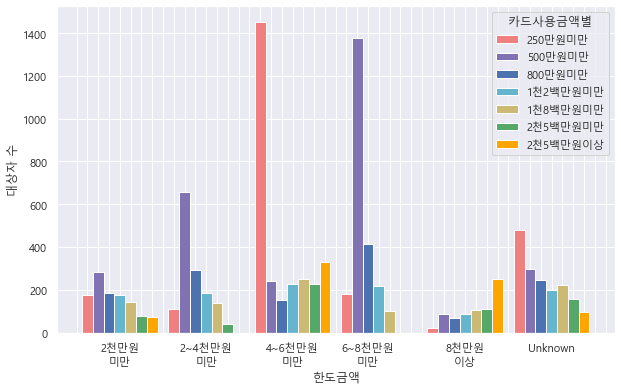

In [166]:
t1 = [18,26,42,10,2,34]
t2 = [19,27,43,11,3,35]
t3 = [20,28,44,12,4,36]
t4 = [21,29,45,13,5,37]
t5 = [22,30,46,14,6,38]
t6 = [23,31,47,15,7,39]
t7 = [24,32,48,16,8,40]


plt.bar(t1, count_A, color='lightcoral', width=1, label='250만원미만')
plt.bar(t2, count_B, color='m', width=1, label='500만원미만')
plt.bar(t3, count_C, color='b', width=1, label='800만원미만')
plt.bar(t4, count_D, color='c', width=1, label='1천2백만원미만')
plt.bar(t5, count_E, color='y', width=1, label='1천8백만원미만')
plt.bar(t6, count_F, color='g', width=1, label='2천5백만원미만')
plt.bar(t7, count_G, color='orange', width=1, label='2천5백만원이상')


plt.xlabel('한도금액')
plt.ylabel('대상자 수')
plt.legend(title='카드사용금액별')

t = list(range(1,51)) 
plt.xticks(t , ('','','','','2천만원\n미만','','','','','','','','2~4천만원\n미만','','','','','','','','4~6천만원\n미만','','','','','','','6~8천만원\n미만','','','','','','','','','8천만원\n이상','','','','','','','','Unknown','','','','',''))   # set the locations of the xticks

plt.show()